# Background


I found the database here:
 - [NeuroMouse Project](http://phm.utoronto.ca/~jeffh/surgical.html)

# Imports

In [1]:
import nibabel as nib  
import numpy
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Directory where the DICOM files are being stored (in this
# case the 'MyHead' folder). 
pathMNC = "C://Cerebral//_MarioSandBox//DB//medicalHolography//UofT Mouse Brain//c57bl6j_skull_whole.mnc"

# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 10

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 1
labelGrayMatter = 2

In [3]:
img = nib.load(pathMNC)
data = img.get_data()

In [4]:
data.shape

(194L, 410L, 205L)

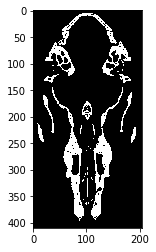

In [15]:
plt.set_cmap("gray")
plt.imshow(data[80,:,:])

In [3]:
reader = vtk.vtkMINCImageReader()

In [4]:
reader.SetFileName(pathMNC)

In [5]:
reader.RescaleRealValuesOn()

In [6]:
attributes = vtk.vtkMINCImageAttributes()
image = reader

In [7]:
# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()

In [8]:
arrayData = pointData.GetArray(0)

In [12]:
# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)

AttributeError: 'NoneType' object has no attribute 'GetDataType'

In [13]:
viewer = vtk.vtkImageViewer()
viewer.SetInputConnection(reader.GetOutputPort())
viewer.SetColorWindow(65535)
viewer.SetColorLevel(0)

# make interface
viewer.Render()


In [ ]:
# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')